# Importing Libraries
    Pandas , Numpy , Matplotlib


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pathlib
import cv2
import pickle

In [2]:
import torch.nn
import torchvision.models as models


In [3]:
from torchsummary import summary

**Reading the first image in the image folder of the dataset**

In [4]:
single_img = plt.imread("/kaggle/input/data/images_001/images/00000001_000.png") 

**Checking the visual of the image**

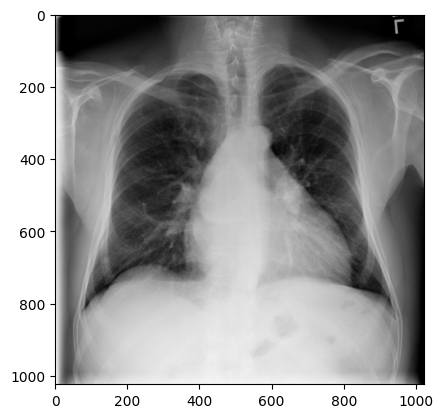

In [5]:
plt.imshow(single_img,cmap = "gray")

In [6]:
data_entries = pd.read_csv("/kaggle/input/data/Data_Entry_2017.csv")

In [7]:
data_entries

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [8]:
all_columns = data_entries.columns
all_columns = list(all_columns)

In [9]:
useful_columns = all_columns[0:2] + all_columns[7:11]

In [10]:
useful_data = data_entries[useful_columns]
useful_data

,Image Index,Finding Labels,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,2582,2991,0.143,0.143
...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,2048,2500,0.168,0.168


In [11]:
useful_data["Image Path"] = "Image path"

/tmp/ipykernel_35/2569064417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data["Image Path"] = "Image path"


In [13]:
Image_path_mapping = []

for i in range(1,13):
    folder_path = f"/kaggle/input/data/images_{i:03}/images"
    
    for abs_path in pathlib.Path(folder_path).glob("*.png"):

        path_file_name = abs_path.name
        Image_path_mapping.append((path_file_name,str(abs_path)))

path_dict = dict(Image_path_mapping)

useful_data.loc[:, "Image Path"] = useful_data["Image Index"].map(path_dict)

In [16]:
pd.set_option('display.max_colwidth', None)
useful_data

,Image Index,Finding Labels,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Image Path
0,00000001_000.png,Cardiomegaly,2682,2749,0.143,0.143,/kaggle/input/data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,2894,2729,0.143,0.143,/kaggle/input/data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2500,2048,0.168,0.168,/kaggle/input/data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,2500,2048,0.171,0.171,/kaggle/input/data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,2582,2991,0.143,0.143,/kaggle/input/data/images_001/images/00000003_000.png
...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030801_001.png
112116,00030802_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030802_000.png
112117,00030803_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030803_000.png
112118,00030804_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030804_000.png


In [17]:
unique_diseases = set()

for disease in useful_data["Finding Labels"]:
    unique_diseases.update(set(disease.split("|")))

In [18]:
unique_diseases = list(unique_diseases)
unique_diseases.remove("No Finding")

In [19]:
unique_diseases

['Fibrosis',
 'Cardiomegaly',
 'Hernia',
 'Pleural_Thickening',
 'Nodule',
 'Edema',
 'Effusion',
 'Infiltration',
 'Emphysema',
 'Pneumothorax',
 'Pneumonia',
 'Consolidation',
 'Atelectasis',
 'Mass']

In [20]:
diseases_to_idx = dict(zip(unique_diseases , range(len(unique_diseases))))

In [21]:
diseases_to_idx

{'Fibrosis': 0,
 'Cardiomegaly': 1,
 'Hernia': 2,
 'Pleural_Thickening': 3,
 'Nodule': 4,
 'Edema': 5,
 'Effusion': 6,
 'Infiltration': 7,
 'Emphysema': 8,
 'Pneumothorax': 9,
 'Pneumonia': 10,
 'Consolidation': 11,
 'Atelectasis': 12,
 'Mass': 13}

In [22]:
"""with open ("diseases_to_idx", "wb") as file_handle:
    pickle.dump(diseases_to_idx,file_handle)"""

'with open ("diseases_to_idx", "wb") as file_handle:\n    pickle.dump(diseases_to_idx,file_handle)'

In [23]:
BBox_list = pd.read_csv("/kaggle/input/data/BBox_List_2017.csv")

In [60]:
BBox_list

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


In [25]:
test_column = "Image Index"

In [54]:
testing_data  = useful_data[useful_data[test_column].isin(BBox_list[test_column])]
seond_data = useful_data[~useful_data[test_column].isin(BBox_list[test_column])]

In [55]:
seond_data

,Image Index,Finding Labels,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Image Path
0,00000001_000.png,Cardiomegaly,2682,2749,0.143,0.143,/kaggle/input/data/images_001/images/00000001_...
1,00000001_001.png,Cardiomegaly|Emphysema,2894,2729,0.143,0.143,/kaggle/input/data/images_001/images/00000001_...
2,00000001_002.png,Cardiomegaly|Effusion,2500,2048,0.168,0.168,/kaggle/input/data/images_001/images/00000001_...
3,00000002_000.png,No Finding,2500,2048,0.171,0.171,/kaggle/input/data/images_001/images/00000002_...
4,00000003_000.png,Hernia,2582,2991,0.143,0.143,/kaggle/input/data/images_001/images/00000003_...
...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030801_...
112116,00030802_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030802_...
112117,00030803_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030803_...
112118,00030804_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030804_...


In [28]:
training_data

,Image Index,Finding Labels,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Image Path
0,00000001_000.png,Cardiomegaly,2682,2749,0.143,0.143,/kaggle/input/data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,2894,2729,0.143,0.143,/kaggle/input/data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2500,2048,0.168,0.168,/kaggle/input/data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,2500,2048,0.171,0.171,/kaggle/input/data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,2582,2991,0.143,0.143,/kaggle/input/data/images_001/images/00000003_000.png
...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030801_001.png
112116,00030802_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030802_000.png
112117,00030803_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030803_000.png
112118,00030804_000.png,No Finding,2048,2500,0.168,0.168,/kaggle/input/data/images_012/images/00030804_000.png


In [29]:
useful_data.shape

(112120, 7)

In [30]:
BBox_list.shape

(984, 9)

In [31]:
missing_ids = BBox_list[~BBox_list[test_column].isin(useful_data[test_column])]
print(f"Missing from useful_data: {len(missing_ids)}")
display(missing_ids.head())


Missing from useful_data: 0


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8


In [32]:
common_ids = BBox_list[BBox_list[test_column].isin(useful_data[test_column])]
print(f"Common: {len(common_ids)}")  


Common: 984


In [33]:
print("Unique images in BBox_list:", BBox_list[test_column].nunique())
print("Unique images in testing_data:", testing_data[test_column].nunique())


Unique images in BBox_list: 880
Unique images in testing_data: 880


In [34]:
print(useful_data[test_column].value_counts())
print(testing_data[test_column].value_counts())


Image Index
00000001_000.png    1
00018360_005.png    1
00018360_016.png    1
00018360_015.png    1
00018360_014.png    1
                   ..
00009863_014.png    1
00009863_013.png    1
00009863_012.png    1
00009863_011.png    1
00030805_000.png    1
Name: count, Length: 112120, dtype: int64
Image Index
00000032_037.png    1
00020393_003.png    1
00020184_013.png    1
00020213_078.png    1
00020259_002.png    1
                   ..
00012834_113.png    1
00012834_122.png    1
00012892_010.png    1
00012973_005.png    1
00030674_000.png    1
Name: count, Length: 880, dtype: int64


In [35]:
def get_multi_hot_label_vector(provided_data):
    

    vector = []


    for single_img_labels in provided_data["Finding Labels"]:
    
        diseases = single_img_labels.split("|")
        single_img_multi_hot_vector = np.zeros((len(diseases_to_idx),))

        if "No Finding" not in diseases:
        
            for single_disease in diseases:
                single_img_multi_hot_vector[diseases_to_idx[single_disease]] = 1.0

        vector.append(single_img_multi_hot_vector)

    return np.array(vector)
        

In [36]:
y_train = get_multi_hot_label_vector(training_data)
y_test = get_multi_hot_label_vector(testing_data)

In [37]:
y_train.shape

(111240, 14)

In [38]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_test.shape

(880, 14)

In [40]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [41]:
pd.reset_option('display.max_colwidth')


In [ ]:
def testing_data_mini_batches_generator(Bounding_box_list,testing_data_df,mb_size=10):

    complete_testing_bbox_df = Bounding_box_list.merge(testing_data_df, on="Image Index", how="inner")
    

    for i in range(complete_testing_bbox_df.shape[0]//mb_size):

        img_np_arr_mb_list = list()
        label_mb_list = list()
        bbox_mb_list = list

        for j in range(1*mb_size,(i+1)*mb_size):
            row = complete_testing_bbox_df.iloc[j]

            single_img_path = row["Image Path"]
            img_np_arr = plt.imread(single_img_path)

            original_img_width = row["OriginalImage[Width"]
            original_img_height = row["Height]"]

            resized_img_np_arr = cv2.resize(img_np_arr,(224224))
            three_channel_np_arr = cv2.cvtColor(resized_img_np_arr,cv2.COLOR_GRAY2RGB)


            x,y,w,h = row["[x"],row["y"],row["w"],row["h]"]
            scale_x = 224.0/original_img_width
            scale_y = 224.0/original_img_height
            bbox_scaled_acc = [x*scale_x,y*scale_y,w*scale_x,h*scale_y]

            bbox_mb_list.append(bbox_scaled_acc)

        x_test_mb = np.array(img_np_arr)
        y_test_mb = y_test[i*mb_size:(i+1)*mb_size,:]
        bboxes_mb = np.array(bbox_mb_list)

        yield x_test_mb, y_test_mb, bboxes_mb 
            

In [42]:
def training_data_mini_batches_generator(training_data_df, mb_size=10):
    
    for i in range (training_data_df.shape[0]//mb_size):

        img_np_array_mb_list = list()
        
        for j in range(i*mb_size,(i+1)*mb_size):
            
            single_img_path  = training_data_df["Image Path"].iloc[j]
            img_np_array = plt.imread(single_img_path)

            resized_img_np_array = cv2.resize(img_np_array,(224,224))
            three_channel_np_array = cv2.cvtColor(resized_img_np_array,cv2.COLOR_GRAY2RGB)

            img_np_array_mb_list.append(three_channel_np_array)

        x_train_mb = np.array(img_np_array_mb_list)
        y_train_mb = y_train[i*mb_size:(i+1)*mb_size,:]

        yield x_train_mb,y_train_mb

In [43]:
class our_custom_resnet50_cnn(torch.nn.Module):

    def __init__(self,num_classes):
        super().__init__()

        self.resnet50_full_net = models.resnet50(weights='ResNet50_Weights.IMAGENET1K_V1')
        self.custom_resnet_fc = torch.nn.Linear(in_features=self.resnet50_full_net.fc.in_features,out_features=num_classes)
        self.our_activation_function = torch.nn.Sigmoid()

    def forward(self,x_train_mb):

        our_resnet_50_fc = torch.nn.Sequential(self.custom_resnet_fc,self.our_activation_function)
        self.resnet50_full_net.fc = our_resnet_50_fc

        y_pred_mb = self.resnet50_full_net(x_train_mb)

        return y_pred_mb

In [44]:
our_model = our_custom_resnet50_cnn(14)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 167MB/s]


In [45]:
summary(our_model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [47]:
for param in our_model.parameters():
    param.requires_grad = False

for param in our_model.custom_resnet_fc.parameters():
    param.requires_grad = True

In [ ]:
abc()
loss_func = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params = our_model.parameters(),lr=0.001)
epochs = 5
mb_size = 10

for i in range(epochs):

    our_training_data_gen = training_data_mini_batches_generator(training_data)
    
    for x_train_mb,y_train_mb in our_training_data_gen:

        y_pred_mb_train = our_model(x_train_mb)
        training_mb_loss = loss_func(y_pred_mb_train,y_train_mb)

        training_mb_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        print("Epoch # {}, Training Loss Value = {}".format(i+1,training_mb_loss))
        